In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tweet-preprocessor
!pip install demoji
!pip install spacy_langdetect
!pip install emoji

     |████████████████████████████████| 1.0MB 8.6MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp37-none-any.whl size=993460 sha256=65a21fd26f83df753cc6b7308bc6c38e72fc69b9a6e1b3ed1668b1c359d5b3a3
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect
     |████████████████████████████████| 133kB 7.6MB/s 


In [ ]:
#Basic Python and Machine learning libraries
import os, sys, warnings, random, time, re, math, string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from collections import Counter
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from IPython.display import display
from tqdm import tqdm_notebook

#Pytorch and nltk and other text relevant libraries
import torch
import nltk, emoji
import demoji
from torch import nn, optim
from torch.optim import lr_scheduler
from torch.functional import F 
from torch.utils.data import Dataset, DataLoader


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize.casual import casual_tokenize
from nltk.util import ngrams

import spacy
from spacy_langdetect import LanguageDetector


#Mandatory Lines of code when working with jupyter notebooks
%matplotlib inline
warnings.filterwarnings('ignore')

#tqdm with pandas
from tqdm import tqdm
tqdm.pandas()

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# sklearn data science models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size'] = 12

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/inter-iit-bridgri2i/Development Data/dev_data_tweet.xlsx')
# data = pd.read_excel('/content/drive/MyDrive/Datasets/IIT tech meet 2021_BRIDGEi2i_NLP/Development Data/dev_data_tweet.xlsx')
data.head()

,Tweet_ID,Tweet,Mobile_Tech_Tag
0,tweet_0001,You'll 💜 my #PitchWars book if you like: 🦋 hat...,0
1,tweet_0002,RT @SkySportsNews: 🚨 Breaking: #WBA have reach...,0
2,tweet_0003,RT @stealyoman_cuso: really says a lot about s...,0
3,tweet_0004,RT @PGtzsche1: HPV vaccines increased serious ...,0
4,tweet_0005,Ramaphosa says if you are positive you must se...,0


## Replace Emogis with corresponding texts

In [ ]:
demoji.download_codes()

... OK (Got response in 0.15 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [ ]:
%%time
for i,tweets in enumerate(data['Tweet']):
  data['Tweet'][i] = demoji.replace_with_desc(tweets, sep = " ")

CPU times: user 7.3 s, sys: 0 ns, total: 7.3 s
Wall time: 7.32 s


In [ ]:
data.head(3)

,Tweet_ID,Tweet,Mobile_Tech_Tag
0,tweet_0001,You'll purple heart my #PitchWars book if yo...,0
1,tweet_0002,RT @SkySportsNews: police car light Breaking...,0
2,tweet_0003,RT @stealyoman_cuso: really says a lot about s...,0


## Remove URLs

In [ ]:
def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)
# text = """Samsung Galaxy S21 smartphones: Will upgraded and cheaper Android get iPhone users to switch? - USA TODAY: Samsung's new Galaxy S21 devices have lower prices than last year's lineup but come with improved cameras,… https://t.co/pm4tBLpqnM #saudiarabia #saudi #arabicemirates"""
# remove_urls(text)

In [ ]:
#Uncomment to use default tweeter preprocessors
# import preprocessor as p
# #forming a separate feature for cleaned tweets
# for i,v in enumerate(data['Tweet']):
#     data.loc[i,'Tweet'] = p.clean(v)
# data.head()

In [ ]:
%%time
for i,tweets in enumerate(data['Tweet']):
  data['Tweet'][i] = remove_urls(tweets)
data.head()

CPU times: user 352 ms, sys: 0 ns, total: 352 ms
Wall time: 358 ms


In [ ]:
# cnt = 5
# for i, tt in enumerate(data['Tweet']):
#   if(i < cnt):
#     print(tt)
#     print("\n")

## Split Camel case words

In [ ]:
def camel_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return " ".join([m.group(0) for m in matches])

# text = """RT @SkySportsNews:  police car light  Breaking: #WBA have reached a verbal agreement with #AFC in the last hour over a loan deal for Ainsley Maitland-Niles. @RobDorsettSky adds he will undergo a medical in London in the next couple of hours. #DeadlineDay  handshake """
# camel_case_split(text)

In [ ]:
%%time
for i,tweets in enumerate(data['Tweet']):
  data['Tweet'][i] = camel_case_split(tweets)

CPU times: user 452 ms, sys: 0 ns, total: 452 ms
Wall time: 455 ms


In [ ]:
data.head()

,Tweet_ID,Tweet,Mobile_Tech_Tag
0,tweet_0001,You'll purple heart my #Pitch Wars book if y...,0
1,tweet_0002,RT @Sky Sports News: police car light Breaki...,0
2,tweet_0003,RT @stealyoman_cuso: really says a lot about s...,0
3,tweet_0004,RT @P Gtzsche1: HPV vaccines increased serious...,0
4,tweet_0005,Ramaphosa says if you are positive you must se...,0


## Remove @ and hash 

In [ ]:
# %%time
# for i,tweets in enumerate(data['Tweet']):
#   data['Tweet'][i] = tweets.replace('@', ' ').replace('#','').replace('_',' ')


In [ ]:
data.head()

,Tweet_ID,Tweet,Mobile_Tech_Tag
0,tweet_0001,You'll purple heart my #Pitch Wars book if y...,0
1,tweet_0002,RT @Sky Sports News: police car light Breaki...,0
2,tweet_0003,RT @stealyoman_cuso: really says a lot about s...,0
3,tweet_0004,RT @P Gtzsche1: HPV vaccines increased serious...,0
4,tweet_0005,Ramaphosa says if you are positive you must se...,0


## Contraction Mapping

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example', 'smartphones':'smartphone'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

In [ ]:
def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = text.lower()
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

In [ ]:
%%time
for i,tweets in enumerate(data['Tweet']):
  data['Tweet'][i] = clean_contractions(tweets, contraction_mapping)

CPU times: user 753 ms, sys: 0 ns, total: 753 ms
Wall time: 764 ms


In [ ]:
data.head()

,Tweet_ID,Tweet,Mobile_Tech_Tag
0,tweet_0001,you will purple heart my pitch wars book if yo...,0
1,tweet_0002,rt sky sports news police car light breaking w...,0
2,tweet_0003,rt stealyomancuso really says a lot about soci...,0
3,tweet_0004,rt p gtzsche1 hpv vaccines increased serious n...,0
4,tweet_0005,ramaphosa says if you are positive you must se...,0


## Tokenize and use models

In [ ]:
message = """this                                          text      is writeen by an  idiot    but he might be a genius"""
casual_tokenize(message, reduce_len=True, strip_handles=True)

['this',
 'text',
 'is',
 'writeen',
 'by',
 'an',
 'idiot',
 'but',
 'he',
 'might',
 'be',
 'a',
 'genius']

In [ ]:
%%time
bags_of_words = []
for text in data.Tweet:
    bags_of_words.append(Counter(casual_tokenize(text)))
df_bows = pd.DataFrame.from_records(bags_of_words)
df_bows = df_bows.fillna(0).astype(int)

CPU times: user 11.5 s, sys: 888 ms, total: 12.4 s
Wall time: 12.4 s


In [ ]:
(df_bows.shape)

(4000, 14982)

In [ ]:
%%time
nb = MultinomialNB()

X, Y = df_bows, data.Mobile_Tech_Tag
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
nb.fit(X_train, Y_train)

CPU times: user 459 ms, sys: 1.43 ms, total: 461 ms
Wall time: 464 ms


In [ ]:
pred = nb.predict(X_test)
acc = accuracy_score(Y_test, pred)
f1 = metrics.f1_score(Y_test, pred)
print("F1 Score: {}\naccurancy: {}".format(f1, acc))

F1 Score: 0.9698630136986301
accurancy: 0.98625


## Selecting features using Lasso regularisation using `SelectFromModel`

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), Y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
sel_.get_support()

array([False, False, False, ..., False, False, False])

In [ ]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 14982
selected features: 37
features with coefficients shrank to zero: 14945


In [ ]:
selected_feat

Index(['risk', 'loan', 'camera', 'phone', 'rajput', '5g', 'jmscindia', 'भर',
       'गन', 'जग', '4india', '4g', 'smartphone', 'dual', 'divergentdigital',
       'postsmartphone', 'guest', 'ux', 'cx', 'agility', 'cio', '48mp', '000m',
       'sumania', 'smartphones', 'tuv', 'rheinland', '662', '91mobiles', 'टफ',
       'पहर', 'drnarottammisra', 'chouhan', '870', 'opposmartphone',
       'opporeno', '5pro5glaunching18thjan2021'],
      dtype='object')

## Identifying the removed features

In [ ]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
print(removed_feats)

Index(['you', 'will', 'purple', 'heart', 'my', 'pitch', 'wars', 'book', 'if',
       'like',
       ...
       'tareek', 'beware', 'a71', '8ज', '128ज', 'saru', 'bhaib', 'dosto',
       '5gvideo', 'videoisfuture'],
      dtype='object', length=14945)


In [ ]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((3200, 37), (800, 37))

In [ ]:
SGDC = SGDClassifier()
LSVC = LinearSVC()

#on CountVectorize data
LSVC.fit(X_train_selected, Y_train)
accuracy_score_lsvc_CV = metrics.accuracy_score(LSVC.predict(X_test_selected), Y_test)
print('accuracy_score_lsvc_cv = '+str('{:4.2f}'.format(accuracy_score_lsvc_CV*100))+'%')

SGDC.fit(X_train_selected, Y_train)
accuracy_score_sgdc_CV = metrics.accuracy_score(SGDC.predict(X_test_selected), Y_test)
print('accuracy_score_sgdc_cv = '+str('{:4.2f}'.format(accuracy_score_sgdc_CV*100))+'%')

accuracy_score_lsvc_cv = 99.88%
accuracy_score_sgdc_cv = 99.88%


In [ ]:
SGDC = SGDClassifier()
LSVC = LinearSVC()

#on CountVectorize data
LSVC.fit(X_train, Y_train)
accuracy_score_lsvc_CV = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print('accuracy_score_lsvc_cv = '+str('{:4.2f}'.format(accuracy_score_lsvc_CV*100))+'%')

SGDC.fit(X_train, Y_train)
accuracy_score_sgdc_CV = metrics.accuracy_score(SGDC.predict(X_test), Y_test)
print('accuracy_score_sgdc_cv = '+str('{:4.2f}'.format(accuracy_score_sgdc_CV*100))+'%')

accuracy_score_lsvc_cv = 99.88%
accuracy_score_sgdc_cv = 99.88%


## K fold cross validation 

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(5, True, 1)
# enumerate splits
i =1
for train, test in kfold.split(data):

  print("###########################################################################################")
  print("CV "+str(i))
  i+=1
  X_train, X_test, Y_train, Y_test = df_bows.loc[train], df_bows.loc[test],data.loc[train].Mobile_Tech_Tag,data.loc[test].Mobile_Tech_Tag
  # Naive Bayes
  nb = MultinomialNB()
  nb.fit(X_train, Y_train)
  pred = nb.predict(X_test)
  acc = accuracy_score(Y_test, pred)
  f1 = metrics.f1_score(Y_test, pred)
  print("Naive Bayes F1 Score: {}\naccurancy: {}".format(f1, acc))

  SGDC = SGDClassifier()
  LSVC = LinearSVC()

  #on CountVectorize data
  LSVC.fit(X_train, Y_train)
  accuracy_score_lsvc_CV = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
  print('accuracy_score_lsvc_cv = '+str('{:4.2f}'.format(accuracy_score_lsvc_CV*100))+'%')

  SGDC.fit(X_train, Y_train)
  accuracy_score_sgdc_CV = metrics.accuracy_score(SGDC.predict(X_test), Y_test)
  print('accuracy_score_sgdc_cv = '+str('{:4.2f}'.format(accuracy_score_sgdc_CV*100))+'%')
  xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
  xgb_model.fit(X_train, Y_train)

  y = xgb_model.predict(X_test)
  print('accuracy_score_xgb_cv = '+str('{:4.2f}'.format(accuracy_score_sgdc_CV*100))+'%',"f1 acore:", metrics.f1_score(y ,Y_test))
  print("###########################################################################################")

###########################################################################################
CV 1
Naive Bayes F1 Score: 0.972972972972973
accurancy: 0.9875
accuracy_score_lsvc_cv = 99.88%
accuracy_score_sgdc_cv = 99.12%
accuracy_score_xgb_cv = 99.12% f1 acore: 0.9972451790633609
###########################################################################################
###########################################################################################
CV 2
Naive Bayes F1 Score: 0.982367758186398
accurancy: 0.99125
accuracy_score_lsvc_cv = 99.88%
accuracy_score_sgdc_cv = 99.75%
accuracy_score_xgb_cv = 99.75% f1 acore: 1.0
###########################################################################################
###########################################################################################
CV 3
Naive Bayes F1 Score: 0.9698375870069605
accurancy: 0.98375
accuracy_score_lsvc_cv = 99.88%
accuracy_score_sgdc_cv = 98.75%
accuracy_score_xgb_cv = 98.75% f1 acore: 0.99534883

In [ ]:
df_bows.loc[[0,12,3]]

,you,will,purple,heart,my,pitch,wars,book,if,like,butterfly,hatetolove,own,voices,acearo,rep,subdued,mythology,rideordie,queerplatonic,bonds,fast,pace,high,risk,star,and,plant,imagery,everywhere,getting,punched,in,your,emotions,herb,pw,party,20,stopwatch,...,replace,assalamualaikum,warahmatullahi,wabarakatuhu,sawaal,karegene,acchi,515k,dursa,kasie,sunday,chahe,v15,लम,medhaj,bbsoluciones,smartphonethai,jssecorg,5gsfor5g,8888,iwkw,यलम,800u,50w,इमर,4all,buisness,singhin,layak,hang,tareek,beware,a71,8ज,128ज,saru,bhaib,dosto,5gvideo,videoisfuture
0,2,1,1,1,1,1,1,1,1,1,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## T-SNE

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [ ]:
MACHINE_EPSILON = np.finfo(np.double).eps
n_components = 2
perplexity = 30
X, y = df_bows, data.Mobile_Tech_Tag

In [ ]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

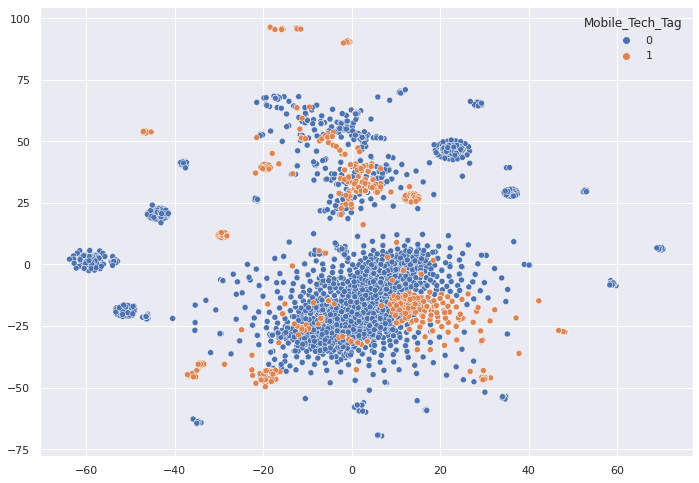

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue= y, legend='full')

# Language detection

In [ ]:
%%time

nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
language = []
for text in data['Tweet']:
  doc = nlp(text[:100])
  language.append(doc._.language['language'])

CPU times: user 1min 9s, sys: 240 ms, total: 1min 10s
Wall time: 1min 10s


In [ ]:
data['language'] = language
data.head()

,Tweet_ID,Tweet,Mobile_Tech_Tag,language
0,tweet_0001,You'll 💜 my #PitchWars book if you like: 🦋 hat...,0,en
1,tweet_0002,RT @SkySportsNews: 🚨 Breaking: #WBA have reach...,0,en
2,tweet_0003,RT @stealyoman_cuso: really says a lot about s...,0,en
3,tweet_0004,RT @PGtzsche1: HPV vaccines increased serious ...,0,en
4,tweet_0005,Ramaphosa says if you are positive you must se...,0,en


In [ ]:
for i, lan in enumerate(data.language):
  if lan != 'en' and lan != 'hi':
    data['language'][i] = 'hinglish'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.language.value_counts()

en          2434
hi           929
hinglish     637
Name: language, dtype: int64